In [21]:
#Import all the Modules Needed
%matplotlib inline

import os
import numpy as np
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import closing, opening, square, skeletonize
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage import data, exposure, img_as_float
from skimage.measure import regionprops, label
from skimage.color import rgb2gray
from scipy import ndimage as ndi

In [10]:
#This function generates an iterable list of file paths to submit later for image processing

def directory_search(directory):
    """
    This function takes the input "directory" which is a file path and returns a list containing 
    all the file paths to all folders within the directory file    
    """
    
    directory_list = [] #initialize list of lists to collect features 
    subdirectories = [f for f in os.listdir(directory) if not f.startswith('.')] #ignores hidden folders
    for i in range(len(subdirectories)):
        folder = subdirectories[i]
        subdirectory = directory+folder
        files = [f for f in os.listdir(subdirectory) if not f.startswith('.')] #ignores hidden folders
        for j in range(len(files)):
            file = files[j]
            file_name = subdirectory+'/'+file
            directory_list.append(file_name)
    return directory_list

#Assemble directory List w/above function
directory = '/Users/Charlie/Desktop/Young Silver Nitrate/' #define this as YOUR path to the 50_categories folder
list_of_paths = directory_search(directory) 

In [39]:
# Open Image as Float 
org_image = imread(list_of_paths[0])
gray_image = rgb2gray(org_image)
# Normalize Image Based on Historgram of Exposure
hist_image = exposure.equalize_hist(gray_image, nbins=256, mask=None)

# Apply Binary Otsu Filter
thresh = threshold_otsu(hist_image)
binary = 1*(gray_image > thresh)
binary = binary.astype('float64')
#binary = ndi.median_filter(binary, size=2) #I may have cheated a little bit here... the coin in the lower left kept trying to fragment on me, so I used this to fill it in


'/Users/Charlie/Desktop/Young Silver Nitrate/JPEGs/MY9_silvernitrate_100x_1.jpg'

(2048, 2048, 3)

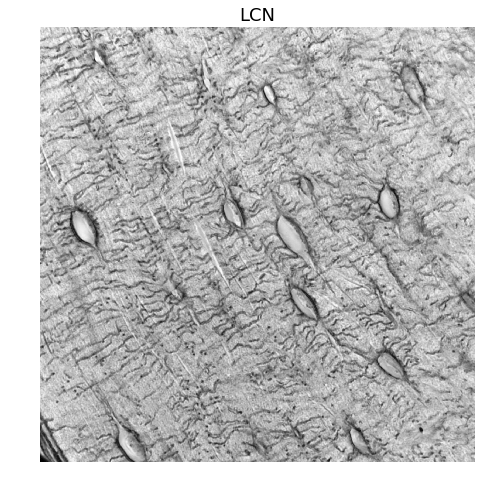

In [42]:
#Plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(gray_image,cmap='gray')
ax.set_axis_off()
plt.title("LCN",fontsize='18')
plt.show()

In [41]:
thresh

0.50195348123088479